# Thinkful - Final Capstone Project Proposal: Siting Wind Farms

### Jeremy Brezovan, December 2019


My parents still live in the bedroom community in which I was raised, in north central Iowa. On a trip home this summer, my dad and I talked about the large number of windmills that have popped up in the farmland south of town in the past decade (I have since learned these windmills are collectively named the [Lundgren Project](https://eerscmap.usgs.gov/uswtdb/viewer/#11.76/42.3582/-94.1259)). Dad and I wondered how these fields were chosen as a location for so many windmills.


## What is the problem you are attempting to solve?

__For this capstone, I would like to build a model to determine strong candidate sites for new wind farms.__


## How is your solution valuable?
__Renewable energy, including wind, is a growing business.__ [This wind energy factsheet from the University of Michigan](http://css.umich.edu/factsheets/wind-energy-factsheet) contains a lot of great information, including the following graph, which shows the steady increase in windpower capacity in the US since the year 2001:


![Growth of wind energy in the US](http://css.umich.edu/sites/default/files/styles/factsheet_image/public/Figure%203%20Cumulative%20Wind%20Capacity.png?itok=ukF-S7vG)

Current US capacity is 96.7 GW--1 GW is roughly enough to power around 725,000 homes (discussion about that number [here](https://www.quora.com/How-many-homes-can-one-gigawatt-in-energy-capacity-provide-for)), so current capacity can power well over 70 million homes. Capacity could increase to cover 20% of all US energy needs by 2030, and 35% by 2050 (also from the U of M factsheet).

__A model like the one I propose could be useful to multiple stakeholders in potential wind energy projects:__
* Investors looking for optimal locations for new wind farms, who can more easily identify and prioritize potential sites;
* The general public, by quantifying and illustrating the reasons why particular sites are favored over others. The placement of wind farms has been an occasionally contentious issue, particularly for residents who live in proximity to a selected site, or who have concerns about windmills’ effects on local wildlife.

With additional work, this model could serve as the core of a tool where a user could enter the GPS coordinates of a point or area, and receive up-to-date information about that site’s viability.


## What is your data source and how will you access it?
At least four major factors come into play when siting a wind project, according to the [American Wind Energy Association](https://www.awea.org/wind-101/siting-a-project). Scope and data availability may limit the number of factors actually used in this capstone:


1. __Strong and consistent winds;__
2. __Large, open space, such as agricultural land.__ [NREL has datasets](https://www.nrel.gov/gis/data-wind.html) featuring “wind power classes” derived from both mean wind speeds and basic topographic features--the shapefile that includes data for the entire US, excluding areas unsuited to wind farm construction due to topography, will be used here. If found, additional data about topography and population density may also be sourced, but the US dataset “with exclusions” has already removed “protected areas (wilderness, wildlife refuges, parks, etc.), incompatible land use (wetlands, urban areas), and other criteria from the available wind resource”;
3. __Minimal risk to wildlife.__ This includes both birds and bats, [which can be especially hard-hit by poorly tuned wind farms](http://www.anthropocenemagazine.org/2017/03/wind-energy-bat-deaths); use data for migratory bird/bat populations, or locations of flyways, and see which areas have a higher population density--[the US Fish and Wildlife Service](https://www.fws.gov/birds/management/flyways.php) may have this information;
4. __Community acceptance.__ If written community survey/commentary was available for an area, sentiment analysis could help determine acceptance. Lacking available data, I scanned Twitter hashtags ([#windpower](https://twitter.com/hashtag/windpower?lang=en), [#windenergy](https://twitter.com/hashtag/windenergy?lang=en), [#windfarm](https://twitter.com/hashtag/windfarm?lang=en)) hoping to find discussions that could be analyzed instead. Unfortunately, I mostly found wind energy company tweets, and retweets by proponents. Wind farm opponents were typically found outside of the US. In a recent example that generated some discussion, a wind project already underway in Ontario, Canada was halted, and the partially-completed construction removed from the site, [over concerns about the impact of the project on the local bat population](https://ottawacitizen.com/news/local-news/ontario-cancels-nearly-built-200m-wind-farm-over-threat-to-bat-populations).

__Additional factors could include:__
* __Proximity to transmission lines that can carry the generated power to customers__ (data available as a shapefile on the Homeland Infrastructure Foundation website);
* __Placement to minimize “shadow flicker”__, the repetitive shadow cast on nearby homes and business by rotating blades, usually during sunrise and sunset. Given the height of an average windmill and the location of the sun on the horizon at sunrise/sunset throughout an average year, some basic calculations could define a buffer zone that would guarantee shadow flicker from a given windmill is minimized. This may be too much detail for this capstone, but in a more advanced version of this tool, a site such as suncalc.org (and its API, here) may be able to provide the information about the sun’s angles relative to the horizon throughout the year.

AWEA goes into more detail about the overall resource assessment process here. CRC Press also has an article about siting wind farms, though unfortunately links to some of their suggested data sources appear to be stale.


## What techniques from the course do you anticipate using?
NREL’s wind class dataset is a representation of the lower 48 states as a grid, with cells ¼ degree of latitude by ⅓ degree of longitude.

__A supervised model__ using data from the above sources will be trained, with the locations of existing wind projects (extracted from Berkeley Lab’s database of US Wind Turbines) as a target.

For each cell in the NREL data that contains windmills, the supervised model can use NREL’s wind class, and features derived from other data sources (details about some of these features are discussed below), to predict which other cells would be best suited to wind farm development.

### In the following map, wind classes are shown in grey - green - blue - orange, with orange being the highest class. Locations of existing windmills are in red:

![Map showing NREL wind class and windmill locations](./Screenshot_2019-12-12_21-04-13.png)

In addition to the wind data, mean windmill height and power output for each cell will be considered (these are existing attributes of the US Wind Turbines dataset).

Power output is an especially important factor to consider--for instance, in my initial analysis, I noticed that the sites for many windmills, particularly in central and southern Texas, do not line up with NREL’s wind classes for large-scale use. Despite being #1 in number of windmills deployed, Texas’ mean power output per windmill is below that of #3 state, Iowa.

Another useful feature will be based on the distance between a given cell and suitable transmission lines. The ability to piggyback on existing infrastructure can cut the costs for a new wind project. States east of the Mississippi River will have the easiest time here, despite having few sites with an NREL wind class of 3 or above. Parts of the West (roughly Montana, Idaho, Wyoming, Utah, and Colorado) will have longer mean distances to transmission lines.

## What do you anticipate to be the biggest challenge you’ll face?
Time, resources, and data availability are my primary concerns. I’m not at all certain where I would be able to find data regarding local opinions about siting wind farms, for instance.

In order to save some time, and definitely to save resources, I’d like to limit this model to just the contiguous 48 states. Offshore wind farms will play a necessary part in the future of renewable energy, particularly in remote locales like Hawaii, Alaska, and Puerto Rico--but focusing on the "lower 48" for the purposes of this capstone will lessen the load on my PC.

(Besides making this tool more interactive, and incorporating data for other parts of the world, another future improvement would be to deploy it to the cloud, where resources can be called upon as needed.)


## Imports and functions

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

%matplotlib inline

In [2]:
# Function for displaying a Folium map
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

## Input data

### US state borders

Found a shapefile of US borders on [data.gov](https://catalog.data.gov/dataset/tiger-line-shapefile-2017-nation-u-s-current-state-and-equivalent-national)--this will serve as the base of most of the static maps.

Limit the map to just the contiguous 48 states--this will help limit project scope, and make visualizations easier.

In [3]:
borders = gpd.read_file("./tl_2017_us_state/tl_2017_us_state.shp")

In [4]:
lower48_borders = borders.loc[(borders['REGION'] < '5') & (~borders['STUSPS'].isin(['AK','HI']))]\
                         .to_crs({'init': 'epsg:4326'})

In [5]:
del borders

In [6]:
# Check the coordinate reference system used for this dataset.
# We'll need to make sure this value matches across all of our datasets.
# The wind dataset uses: {'init': 'epsg:4326'}, and it's the largest dataset by far, so convert to that CRS.
print(lower48_borders.crs)

{'init': 'epsg:4326'}


### The x-most points of the 48 contiguous states

Wikipedia maintains a helpful list of [the northernmost/southernmost/etc. points of the continental US](https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States).

Let's limit this tool to locations within the 48 contiguous states.

Add a half of a degree to the westernmost longitude and southernmost latitude, so we can capture offshore sites along the Pacific coasts, and south of Florida. (Geography makes this adjustment unnecessary along the Atlantic coast, or northern border.)

Each degree of latitude/longitude is approximately 69 miles (111 kilometers) apart--this is not strictly true away from the equator, but for our purposes, this estimate is fine.


In [7]:
# North: the Northwest Angle, MN
northernmost = {'lat': 49.384472,'long': -95.153389}

# South: Key West, FL
southernmost = {'lat': 24.54409 - .50, 'long': -81.804905}

# East: West Quoddy Head, ME
easternmost = {'lat': 44.815389, 'long': -66.949778}

# West: Cape Alava, WA
westernmost = {'lat': 48.164167, 'long': -124.733056 - .50}

Create a GeoDataFrame defining a big polygon with these boundaries, so we can join it to other datasets.

In [8]:
latlong_polygon = Polygon([(easternmost['long'],northernmost['lat']),
                           (easternmost['long'],southernmost['lat']),
                           (westernmost['long'],southernmost['lat']),
                           (westernmost['long'],northernmost['lat']),
                         ])
latlong_limits = gpd.GeoDataFrame(gpd.GeoSeries(latlong_polygon),
                                  columns=['geometry'])
latlong_limits.crs = {'init': 'epsg:4326'}

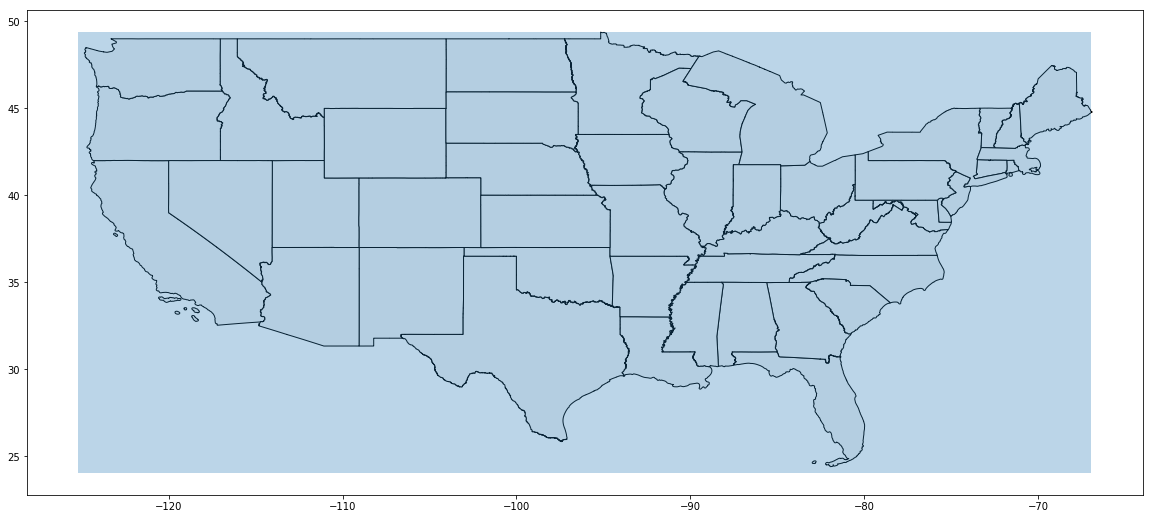

In [9]:
# Validate we drew our polygon correctly
ax = lower48_borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')
latlong_limits.plot(alpha=.3,ax=ax)

### Wind / basic topography classification

This dataset comes from [the Wind Data page of NREL's Geospatial Data Science site](https://www.nrel.gov/gis/data-wind.html). (NREL is the National Renewable Energy Laboratory.)

Mean wind speeds, as well as basic topography, determine the "wind power class" to which an area belongs:

> The conterminous United States was divided into grid cells 1/4 degree of latitude by 1/3 degree of
longitude. Each grid cell was assigned a wind power class ranging from 1 to 6, with 6 being the
windiest.

> Areas designated class 3 or greater are suitable for most utility-scale wind turbine applications,
whereas class 2 areas are marginal for utility-scale applications but may be suitable for rural
applications.

> The NREL-produced map data only apply to areas of low surface roughness (e.g., grassy plains) and exclude areas with slopes greater than 20%.

In [10]:
wind_data = gpd.read_file('./ref-wind-with-exclusions/ref_wind.shp')

In [11]:
wind_data.crs

{'init': 'epsg:4326'}

In [12]:
print(wind_data.head())

     gid     id  wind_class                                           geometry
0  60475  60475           4  POLYGON ((-112.59289 46.40693, -112.59244 46.4...
1  60476  60476           3  POLYGON ((-112.59710 46.40275, -112.59755 46.4...
2  60740  60740           3  POLYGON ((-112.57396 46.39460, -112.57723 46.3...
3  60741  60741           3  POLYGON ((-112.57140 46.39491, -112.57108 46.3...
4  60803  60803           3  POLYGON ((-112.57396 46.39460, -112.57140 46.3...


In [13]:
wind_data['wind_class'].value_counts()

3    258703
4    132885
5     66383
6     16085
7      5218
Name: wind_class, dtype: int64

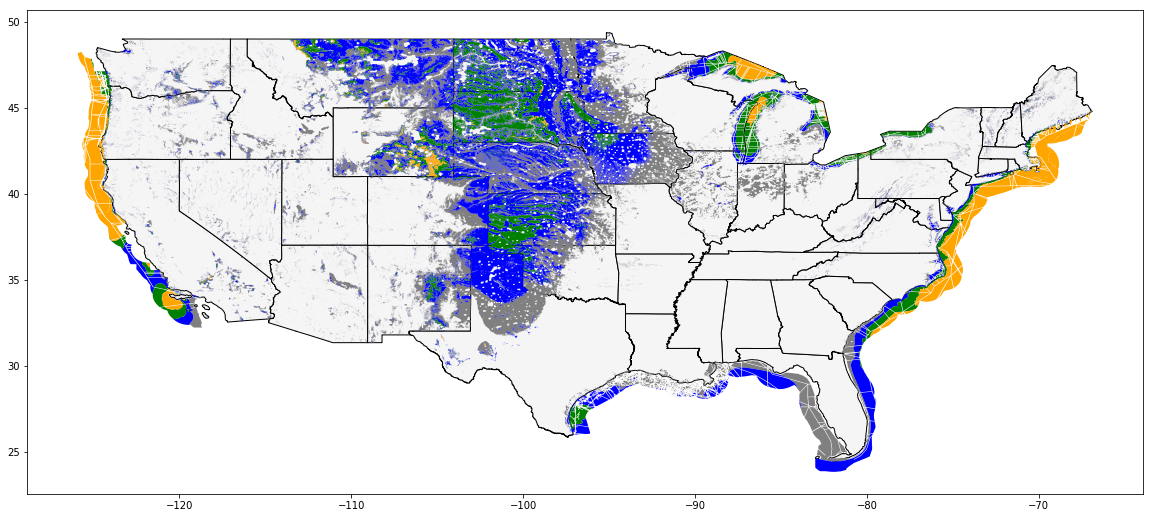

In [14]:
ax = lower48_borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')
wind_data.loc[wind_data['wind_class'] == 3].plot(ax=ax,color='gray')
wind_data.loc[wind_data['wind_class'] == 4].plot(ax=ax,color='blue')
wind_data.loc[wind_data['wind_class'] == 5].plot(ax=ax,color='green')
wind_data.loc[wind_data['wind_class'] > 5].plot(ax=ax,color='orange')
#existing_lower48.plot(ax=ax,color='red')

### Transmission lines

Transmission lines will be needed to carry the generated power to customers, from potentially remote areas where wind farms are located. The locations of suitable lines are in this shapefile, retrieved from the [Homeland Infrastructure Foundation website](https://hifld-geoplatform.opendata.arcgis.com/datasets/electric-power-transmission-lines).

In [80]:
power_lines = gpd.read_file("./Electric_Power_Transmission_Lines/Electric_Power_Transmission_Lines.shp")

In [81]:
power_lines.drop('geometry',axis=1).describe(include='all')

,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,SHAPE__Len
count,83207.000000,83207,83207,83207,83207,83207,83207,83207,83207,83207,83207,83207.000000,83207,83207,83207,83207,8.320700e+04
unique,NaN,83207,8,5,1,2,861,1081,4,1025,521,NaN,8,2,43366,41631,NaN
top,NaN,309099,"AC, OVERHEAD",IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2017-01-01T00:00:00.000Z,IMAGERY,2017-01-01T00:00:00.000Z,NOT AVAILABLE,NaN,100-161,Y,NOT AVAILABLE,NOT AVAILABLE,NaN
freq,NaN,1,42700,65048,83207,83206,23334,2643,61956,2312,41093,NaN,41148,52048,510,4083,NaN
mean,41689.741500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-202629.610706,NaN,NaN,NaN,NaN,1.376408e+04
std,24064.359893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402092.208093,NaN,NaN,NaN,NaN,2.669033e+04
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999999.000000,NaN,NaN,NaN,NaN,1.765471e+00
25%,20851.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,1.347282e+03
50%,41694.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,NaN,NaN,NaN,NaN,6.043115e+03
75%,62539.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.000000,NaN,NaN,NaN,NaN,1.575590e+04


In [82]:
print(power_lines.crs)

{'init': 'epsg:4326'}


Identify high-voltage transmission lines--these are better-suited for conveying the power generated by a wind farm to customers. [Wikipedia](https://en.wikipedia.org/wiki/Electric_power_transmission) suggests lower-voltage lines are intended to deliver power to individual homes or businesses.

For now, we only care about lines that already exist, and lines under construction. We may choose to include proposed lines later, but given a lower weight for the model.

Join filtered power line data to our latitude/longitude limits, so we're only looking at lines for the lower 48 states.

In [83]:
high_power_lines = gpd.sjoin(power_lines.loc[(~power_lines['VOLT_CLASS'].isin(['UNDER 100','100-161','NOT AVAILABLE'])) &
                                   (power_lines['STATUS'].isin(['IN SERVICE','UNDER CONST']))],
                              latlong_limits)

In [84]:
del power_lines

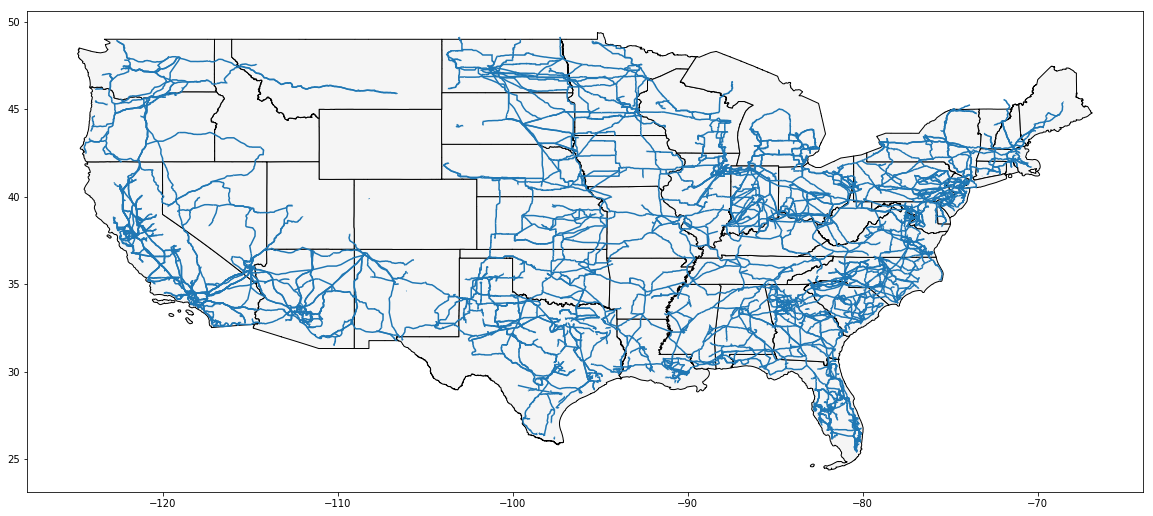

In [86]:
ax = lower48_borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')
high_power_lines.plot(figsize=(15,15),ax=ax)

### Dependent variable for supervised learning: locations of existing windmills

Shapefile obtained via the [US Wind Turbine Database](https://www.sciencebase.gov/catalog/item/57bdfd8fe4b03fd6b7df5ff9).

Besides location, this dataset contains information about each windmill (manufacturer, model, power capacity)--we can provide these variables to our model as well.

In [59]:
existing_windmills = gpd.read_file("./uswtdb_v2_2_20191004/uswtdb_v2_2_20191004.shp")

In [60]:
existing_windmills.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,...,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,geometry
0,3073403.0,missing,missing,5818.0,CA,Kern County,06029,251 Wind,1987.0,194.0,...,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.352219,35.088993,POINT (-118.35222 35.08899)
1,3001002.0,missing,missing,4950.0,CA,Kern County,06029,251 Wind,1987.0,194.0,...,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.357185,35.086594,POINT (-118.35719 35.08659)
2,3005085.0,missing,missing,5773.0,CA,Kern County,06029,251 Wind,1987.0,194.0,...,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.353485,35.085896,POINT (-118.35349 35.08590)
3,3073404.0,missing,missing,5806.0,CA,Kern County,06029,251 Wind,1987.0,194.0,...,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.352531,35.087852,POINT (-118.35253 35.08785)
4,3073401.0,missing,missing,5761.0,CA,Kern County,06029,251 Wind,1987.0,194.0,...,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.354652,35.085163,POINT (-118.35465 35.08516)


In [61]:
existing_windmills.crs

{'init': 'epsg:4269'}

Minor cleanup - a number of these windmills were identified via aerial photos and do not have information about manufacturer/model or power capacity, making them useless to the model I propose.

In [63]:
existing_windmills = existing_windmills.loc[existing_windmills['t_cap'] > 0]

In [64]:
existing_windmills.shape

(56531, 25)

In [66]:
# Limit to the 48 contiguous states. I wasn't able to convert with to_crs(),
# so if we need to perform operations that require the same CRS later, I'll have to figure that out.
existing_lower48 = existing_windmills.loc[(existing_windmills['ylat'] >= southernmost['lat']) & \
                                          (existing_windmills['ylat'] <= northernmost['lat']) & \
                                          (existing_windmills['xlong'] <= easternmost['long']) & \
                                          (existing_windmills['xlong'] >= westernmost['long'])]

In [42]:
del existing_windmills

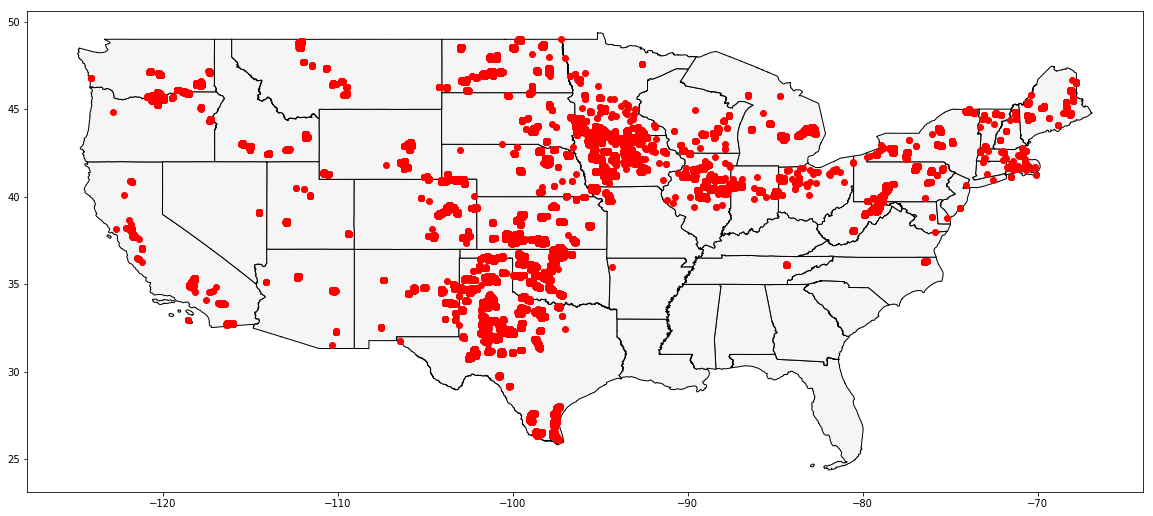

In [69]:
ax = lower48_borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')
existing_lower48.plot(figsize=(15,15),ax=ax,color='red')

Here we can see that Texas has the largest number of active windmills, with California in second place, but Iowa's overall mean output blows California's away. I think we will see a relationship between NREL's wind class and windmill output capacity.

In [72]:
existing_lower48['t_state'].value_counts().head(10)

TX    13628
CA     6075
IA     4870
OK     3966
KS     2993
IL     2779
MN     2488
CO     2286
OR     1866
WA     1727
Name: t_state, dtype: int64

In [74]:
existing_lower48.loc[(existing_lower48['t_state'] == 'TX'),['t_cap']].mean()

t_cap    1872.464045
dtype: float64

In [75]:
existing_lower48.loc[(existing_lower48['t_state'] == 'CA'),['t_cap']].mean()

t_cap    935.772016
dtype: float64

In [77]:
existing_lower48.loc[(existing_lower48['t_state'] == 'IA'),['t_cap']].mean()

t_cap    1840.778029
dtype: float64